# Data Manipulation with Pandas

In [5]:
# unpickle homelessness data
import pickle
filename = 'homeless_data.pkl'
infile = open(filename,'rb')
homelessness = pickle.load(infile)
infile.close()

In [6]:
type(homelessness)

pandas.core.frame.DataFrame

In [8]:
# exploring homlessness dataframe
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [9]:
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          51 non-null     object 
 1   state           51 non-null     object 
 2   individuals     51 non-null     float64
 3   family_members  51 non-null     float64
 4   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


In [11]:
homelessness.shape

(51, 5)

In [16]:
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3504.882353,6.405637e+06
std,15991.025083,7805.411811,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,592.000000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


In [17]:
#Components of dataframes
homelessness.values

array([['East South Central', 'Alabama', 2570.0, 864.0, 4887681],
       ['Pacific', 'Alaska', 1434.0, 582.0, 735139],
       ['Mountain', 'Arizona', 7259.0, 2606.0, 7158024],
       ['West South Central', 'Arkansas', 2280.0, 432.0, 3009733],
       ['Pacific', 'California', 109008.0, 20964.0, 39461588],
       ['Mountain', 'Colorado', 7607.0, 3250.0, 5691287],
       ['New England', 'Connecticut', 2280.0, 1696.0, 3571520],
       ['South Atlantic', 'Delaware', 708.0, 374.0, 965479],
       ['South Atlantic', 'District of Columbia', 3770.0, 3134.0, 701547],
       ['South Atlantic', 'Florida', 21443.0, 9587.0, 21244317],
       ['South Atlantic', 'Georgia', 6943.0, 2556.0, 10511131],
       ['Pacific', 'Hawaii', 4131.0, 2399.0, 1420593],
       ['Mountain', 'Idaho', 1297.0, 715.0, 1750536],
       ['East North Central', 'Illinois', 6752.0, 3891.0, 12723071],
       ['East North Central', 'Indiana', 3776.0, 1482.0, 6695497],
       ['West North Central', 'Iowa', 1711.0, 1038.0, 3148618]

In [18]:
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [19]:
homelessness.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
            50],
           dtype='int64')

# Transforming Data

In [20]:
# Sorting 
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


In [21]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members',ascending=False)

# Print the top few rows
print(homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


In [24]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region','family_members'],ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head(12))

                region         state  individuals  family_members  state_pop
13  East North Central      Illinois       6752.0          3891.0   12723071
35  East North Central          Ohio       6929.0          3320.0   11676341
22  East North Central      Michigan       5209.0          3142.0    9984072
49  East North Central     Wisconsin       2740.0          2167.0    5807406
14  East North Central       Indiana       3776.0          1482.0    6695497
42  East South Central     Tennessee       6139.0          1744.0    6771631
17  East South Central      Kentucky       2735.0           953.0    4461153
0   East South Central       Alabama       2570.0           864.0    4887681
24  East South Central   Mississippi       1024.0           328.0    2981020
32        Mid-Atlantic      New York      39827.0         52070.0   19530351
38        Mid-Atlantic  Pennsylvania       8163.0          5349.0   12800922
30        Mid-Atlantic    New Jersey       6048.0          3350.0    8886025

In [32]:
# subsetting by columns
# Select the individuals column
individuals_series = homelessness['individuals']
individuals_df = homelessness[['individuals']]

In [33]:
print(type(individuals_series))
print(type(individuals_df))   

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [34]:
# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [35]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


In [36]:
# subsetting by rows
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# See the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [37]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [38]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=='Pacific')]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


In [39]:
#Subsetting rows by categorical variables - using isin
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[homelessness['region'].isin(['South Atlantic','Mid-Atlantic'])]
# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [40]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness =homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


In [41]:
# adding new columns
homelessness['total']=homelessness['individuals']+homelessness['family_members']
# Add p_individuals col as proportion of individuals
homelessness['p_individuals']=homelessness['individuals']/homelessness['total']

# See the result
print(homelessness.head())

               region       state  individuals  family_members  state_pop  \
0  East South Central     Alabama       2570.0           864.0    4887681   
1             Pacific      Alaska       1434.0           582.0     735139   
2            Mountain     Arizona       7259.0          2606.0    7158024   
3  West South Central    Arkansas       2280.0           432.0    3009733   
4             Pacific  California     109008.0         20964.0   39461588   

      total  p_individuals  
0    3434.0       0.748398  
1    2016.0       0.711310  
2    9865.0       0.735834  
3    2712.0       0.840708  
4  129972.0       0.838704  


In [42]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals']/homelessness['state_pop'] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k',ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)



                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


# Aggregating Data

In [45]:
# Summary Statistics
# uncompress and unpickle walmart sales data
import pickle
import bz2
filename = 'walmart_sales.pkl.bz2'
infile = bz2.open(filename,'rb')
sales = pickle.load(infile)
infile.close()

In [46]:
type(sales)

pandas.core.frame.DataFrame

In [47]:
# Print the head of the sales DataFrame
print(sales.head())

   store type  department       date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1 2010-02-05      24924.50       False       5.727778   
1      1    A           2 2010-02-05      50605.27       False       5.727778   
2      1    A           3 2010-02-05      13740.12       False       5.727778   
3      1    A           4 2010-02-05      39954.04       False       5.727778   
4      1    A           5 2010-02-05      32229.38       False       5.727778   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.679451         8.106  
2              0.679451         8.106  
3              0.679451         8.106  
4              0.679451         8.106  


In [48]:
# Print the info about the sales DataFrame
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413119 entries, 0 to 413118
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   store                 413119 non-null  int64         
 1   type                  413119 non-null  object        
 2   department            413119 non-null  int32         
 3   date                  413119 non-null  datetime64[ns]
 4   weekly_sales          413119 non-null  float64       
 5   is_holiday            413119 non-null  bool          
 6   temperature_c         413119 non-null  float64       
 7   fuel_price_usd_per_l  413119 non-null  float64       
 8   unemployment          413119 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 27.2+ MB
None


In [49]:
# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

16094.726811185497
7682.47


In [50]:
# Print the maximum of the date column
print(sales['date'].max())
# Print the minimum of the date column
print(sales['date'].min())

2012-10-26 00:00:00
2010-02-05 00:00:00


In [52]:
# .agg()
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [53]:
# Print IQR of the temperature_c column
sales['temperature_c'].agg(iqr)

15.299999999999994

In [56]:
# Print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
sales[["temperature_c","fuel_price_usd_per_l","unemployment"]].agg(iqr)

temperature_c           15.300000
fuel_price_usd_per_l     0.211866
unemployment             1.672000
dtype: float64

In [59]:
# print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
import numpy as np
sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median])

,temperature_c,fuel_price_usd_per_l,unemployment
iqr,15.30,0.211866,1.672
median,16.75,0.911922,7.852


In [65]:
# cumulative statistics
# create sales_1_1 dataframe which contains the sales data for department 1 of store 1
sales_1=sales[sales["store"]==1]
sales_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [66]:
sales_1_1= sales_1[sales_1["department"]==1]
sales_1_1.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
73,1,A,1,2010-02-12,46039.49,True,3.616667,0.673111,8.106
145,1,A,1,2010-02-19,41595.55,False,4.405556,0.664129,8.106
218,1,A,1,2010-02-26,19403.54,False,8.127778,0.676545,8.106
290,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106


In [67]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

In [69]:
# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales['weekly_sales'].cumsum()

In [70]:
# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales']=sales_1_1['weekly_sales'].cummax()

In [71]:
# See the columns you calculated
sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]]

,date,weekly_sales,cum_weekly_sales,cum_max_sales
0,2010-02-05,24924.50,2.492450e+04,24924.50
73,2010-02-12,46039.49,1.689730e+06,46039.49
145,2010-02-19,41595.55,3.327244e+06,46039.49
218,2010-02-26,19403.54,4.917020e+06,46039.49
290,2010-03-05,21827.90,6.329172e+06,46039.49
...,...,...,...,...
9883,2012-09-28,18947.81,2.147391e+08,57592.12
9956,2012-10-05,21904.47,2.161791e+08,57592.12
10028,2012-10-12,22764.01,2.178508e+08,57592.12
10101,2012-10-19,24185.27,2.194253e+08,57592.12


In [ ]:
# Counting

In [72]:
# dropping duplicates
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
10244,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
20482,3,B,1,2010-02-05,6453.58,False,7.616667,0.679451,7.368
29518,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
39790,5,B,1,2010-02-05,9323.89,False,4.277778,0.679451,6.566


In [73]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
3,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
4,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [74]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
store_counts

A    22
B    17
C     6
Name: type, dtype: int64

In [75]:
# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
store_props

A    0.488889
B    0.377778
C    0.133333
Name: type, dtype: float64

# Grouped summary statistics

In [78]:
# What percent of sales occurred at each store type?
# without groupby

# Calc total weekly sales
sales_all=sales["weekly_sales"].sum()
sales_all

6649037445.509999

In [84]:
# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"]=="A"]["weekly_sales"].sum()
print(sales_A)

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"]=="B"]["weekly_sales"].sum()
print(sales_B)


# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()
print(sales_C)

4331014722.749999
1912519195.2199998
405503527.53999996


In [85]:
# Get proportion for each type
sales_propn_by_type = [sales_A,sales_B,sales_C] /sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


In [86]:
# using groupby
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
sales_by_type

type
A    4.331015e+09
B    1.912519e+09
C    4.055035e+08
Name: weekly_sales, dtype: float64

In [87]:
# Get proportion for each type
sales_propn_by_type = sales.groupby("type")["weekly_sales"].sum()/sum(sales_by_type)
sales_propn_by_type

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64

In [88]:
# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         4.007612e+09
      True          3.234028e+08
B     False         1.765411e+09
      True          1.471081e+08
C     False         3.772478e+08
      True          2.825570e+07
Name: weekly_sales, dtype: float64


In [92]:
# Multiple grouped summaries
# Import NumPy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby(["type"])["unemployment","fuel_price_usd_per_l"].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         amin       amax          mean    median
type                                            
A    -4988.94  474330.10  20099.568043  10105.17
B    -3924.00  693099.36  12335.331875   6269.02
C     -379.00  112152.35   9519.532538   1149.67
     unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676  


C:\Users\shrut\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


In [ ]:
# Pivot tables

In [94]:
# Pivoting on one variable
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     20099.568043
B     12335.331875
C      9519.532538


In [95]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean,np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     20099.568043     10105.17
B     12335.331875      6269.02
C      9519.532538      1149.67


In [96]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales',index="type",columns="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False         True 
type                                  
A           20008.746759  21297.517824
B           12248.741339  13478.844240
C            9518.528116   9532.963131


In [97]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales',index='department',columns='type', fill_value=0))

type                   A             B             C
department                                          
1           22956.887886  17990.876158   8951.733462
2           51994.674873  43051.996919  14424.851713
3           13881.033137  12965.414311    820.276818
4           32973.814075  21259.895804  13669.370396
5           26803.448045  21184.602916    767.600774
...                  ...           ...           ...
95          97094.026043  40580.306862  50641.564872
96          19900.943552   4752.674874  15766.025431
97          22093.807101   3543.243304  13419.542809
98          10979.816195    299.951644   5479.758054
99            431.443064     25.716667      8.330952

[81 rows x 3 columns]


In [98]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
sales.pivot_table(values="weekly_sales", index="department", columns="type",fill_value=0,margins=True)

type,A,B,C,All
department,,,,
1,22956.887886,17990.876158,8951.733462,19213.485088
2,51994.674873,43051.996919,14424.851713,43607.020113
3,13881.033137,12965.414311,820.276818,11793.698516
4,32973.814075,21259.895804,13669.370396,25974.630238
5,26803.448045,21184.602916,767.600774,21365.583515
...,...,...,...,...
96,19900.943552,4752.674874,15766.025431,15217.211505
97,22093.807101,3543.243304,13419.542809,14437.120839
98,10979.816195,299.951644,5479.758054,6973.013875


# Slicing and indexing

In [ ]:
# explicit indices

In [129]:
import pandas as pd
temperatures = pd.read_csv("temperatures.csv")
temperatures.head()

,date,city,country,avg_temp_c
0,1995-01-01,Calgary,Canada,12.6
1,1995-01-02,Calgary,Canada,4.5
2,1995-01-03,Calgary,Canada,2.5
3,1995-01-04,Calgary,Canada,11.4
4,1995-01-05,Calgary,Canada,11.3


In [131]:
# Index temperatures by city
temperatures_ind = temperatures.set_index("city")
temperatures_ind.head()

,date,country,avg_temp_c
city,,,
Calgary,1995-01-01,Canada,12.6
Calgary,1995-01-02,Canada,4.5
Calgary,1995-01-03,Canada,2.5
Calgary,1995-01-04,Canada,11.4
Calgary,1995-01-05,Canada,11.3


In [133]:
# Reset the index, keeping its contents
temperatures_ind.reset_index()

,city,date,country,avg_temp_c
0,Calgary,1995-01-01,Canada,12.6
1,Calgary,1995-01-02,Canada,4.5
2,Calgary,1995-01-03,Canada,2.5
3,Calgary,1995-01-04,Canada,11.4
4,Calgary,1995-01-05,Canada,11.3
...,...,...,...,...
1048570,Toledo,2006-01-25,US,31.9
1048571,Toledo,2006-01-26,US,29.6
1048572,Toledo,2006-01-27,US,33.0
1048573,Toledo,2006-01-28,US,44.1


In [134]:
# Reset the index, dropping its contents
temperatures_ind.reset_index(drop=True)

,date,country,avg_temp_c
0,1995-01-01,Canada,12.6
1,1995-01-02,Canada,4.5
2,1995-01-03,Canada,2.5
3,1995-01-04,Canada,11.4
4,1995-01-05,Canada,11.3
...,...,...,...
1048570,2006-01-25,US,31.9
1048571,2006-01-26,US,29.6
1048572,2006-01-27,US,33.0
1048573,2006-01-28,US,44.1


In [136]:
#subsetting using .loc[]

# Make a list of cities to subs
cities = ['Calgary','Orlando']

# Subset temperatures using square brackets
temperatures[temperatures['city'].isin(cities)]


,date,city,country,avg_temp_c
0,1995-01-01,Calgary,Canada,12.6
1,1995-01-02,Calgary,Canada,4.5
2,1995-01-03,Calgary,Canada,2.5
3,1995-01-04,Calgary,Canada,11.4
4,1995-01-05,Calgary,Canada,11.3
...,...,...,...,...
362381,2020-05-09,Orlando,US,75.1
362382,2020-05-10,Orlando,US,73.9
362383,2020-05-11,Orlando,US,74.6
362384,2020-05-12,Orlando,US,74.2


In [137]:
# Subset temperatures_ind using .loc[]
temperatures_ind.loc[cities]

,date,country,avg_temp_c
city,,,
Calgary,1995-01-01,Canada,12.6
Calgary,1995-01-02,Canada,4.5
Calgary,1995-01-03,Canada,2.5
Calgary,1995-01-04,Canada,11.4
Calgary,1995-01-05,Canada,11.3
...,...,...,...
Orlando,2020-05-09,US,75.1
Orlando,2020-05-10,US,73.9
Orlando,2020-05-11,US,74.6


In [140]:
# setting multilevel indices

# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])
temperatures_ind.head()

date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3

In [142]:
# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Canada","Calgary"),("US","Orlando")]

# Subsetting inner levels with tuples
print(temperatures_ind.loc[rows_to_keep])

                       date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Orlando  2020-05-09        75.1
        Orlando  2020-05-10        73.9
        Orlando  2020-05-11        74.6
        Orlando  2020-05-12        74.2
        Orlando  2020-05-13        69.1

[16365 rows x 2 columns]


In [144]:
# Sorting by index values
# Sort temperatures_ind by index values
temperatures_ind.sort_index()

date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Yuma     2006-12-24       -99.0
        Yuma     2006-12-25       -99.0
        Yuma     2006-12-26        58.3
        Yuma     2006-12-27        61.2
        Yuma     2006-12-28        55.7

[1048575 rows x 2 columns]

In [145]:
# Sort temperatures_ind by index values at the city level
temperatures_ind.sort_index(level=["city"])

date  avg_temp_c
country city                                
US      Akron Canton  1995-01-01        40.3
        Akron Canton  1995-01-02        21.2
        Akron Canton  1995-01-03        19.4
        Akron Canton  1995-01-04        13.1
        Akron Canton  1995-01-05         7.7
...                          ...         ...
        Yuma          2006-12-24       -99.0
        Yuma          2006-12-25       -99.0
        Yuma          2006-12-26        58.3
        Yuma          2006-12-27        61.2
        Yuma          2006-12-28        55.7

[1048575 rows x 2 columns]

In [146]:
# Sort temperatures_ind by country then descending city
temperatures_ind.sort_index(level=["country","city"], ascending=[True,False])

date  avg_temp_c
country city                                
Canada  Winnipeg      1995-01-01       -11.2
        Winnipeg      1995-01-02         3.3
        Winnipeg      1995-01-03       -13.8
        Winnipeg      1995-01-04       -11.9
        Winnipeg      1995-01-05         5.2
...                          ...         ...
US      Akron Canton  2020-05-09        35.9
        Akron Canton  2020-05-10        45.5
        Akron Canton  2020-05-11        41.0
        Akron Canton  2020-05-12        44.7
        Akron Canton  2020-05-13        46.4

[1048575 rows x 2 columns]

In [148]:
# slicing and subsetting using loc and iloc
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()
temperatures_srt

date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Yuma     2006-12-24       -99.0
        Yuma     2006-12-25       -99.0
        Yuma     2006-12-26        58.3
        Yuma     2006-12-27        61.2
        Yuma     2006-12-28        55.7

[1048575 rows x 2 columns]

In [149]:
# Subset rows from Canada to US
temperatures_srt.loc["Canada":"US"]

date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Yuma     2006-12-24       -99.0
        Yuma     2006-12-25       -99.0
        Yuma     2006-12-26        58.3
        Yuma     2006-12-27        61.2
        Yuma     2006-12-28        55.7

[1048575 rows x 2 columns]

In [150]:
# Try to subset rows from Calgary to Orlando
print(temperatures_srt.loc["Calgary":"Orlando"])   # this will return nonsense

                        date  avg_temp_c
country city                            
Canada  Calgary   1995-01-01        12.6
        Calgary   1995-01-02         4.5
        Calgary   1995-01-03         2.5
        Calgary   1995-01-04        11.4
        Calgary   1995-01-05        11.3
...                      ...         ...
        Winnipeg  2014-06-06        61.9
        Winnipeg  2014-06-07        56.0
        Winnipeg  2014-06-08        57.9
        Winnipeg  2014-06-09        57.6
        Winnipeg  2014-06-10        67.8

[74245 rows x 2 columns]


In [153]:
# Subset rows from Canada, Calgary to US, Orlando
temperatures_srt.loc[("Canada","Calgary"):("US","Orlando")]

date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Orlando  2020-05-09        75.1
        Orlando  2020-05-10        73.9
        Orlando  2020-05-11        74.6
        Orlando  2020-05-12        74.2
        Orlando  2020-05-13        69.1

[728652 rows x 2 columns]

In [155]:
# Slicing in both directions
# Subset rows from  Canada , Calgary to India, Hyderabad
print(temperatures_srt.loc[("Canada","Calgary"):("India","Hyderabad")])

                        date  avg_temp_c
country city                            
Canada  Calgary   1995-01-01        12.6
        Calgary   1995-01-02         4.5
        Calgary   1995-01-03         2.5
        Calgary   1995-01-04        11.4
        Calgary   1995-01-05        11.3
...                      ...         ...
        Winnipeg  2014-06-06        61.9
        Winnipeg  2014-06-07        56.0
        Winnipeg  2014-06-08        57.9
        Winnipeg  2014-06-09        57.6
        Winnipeg  2014-06-10        67.8

[74245 rows x 2 columns]


In [156]:
# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

                       date  avg_temp_c
country city                           
Canada  Calgary  1995-01-01        12.6
        Calgary  1995-01-02         4.5
        Calgary  1995-01-03         2.5
        Calgary  1995-01-04        11.4
        Calgary  1995-01-05        11.3
...                     ...         ...
US      Yuma     2006-12-24       -99.0
        Yuma     2006-12-25       -99.0
        Yuma     2006-12-26        58.3
        Yuma     2006-12-27        61.2
        Yuma     2006-12-28        55.7

[1048575 rows x 2 columns]


In [157]:
# Subset in both directions at once
print(temperatures_srt.loc[("Canada","Calgary"):("India","Hyderabad"),"date":"avg_temp_c"])

                        date  avg_temp_c
country city                            
Canada  Calgary   1995-01-01        12.6
        Calgary   1995-01-02         4.5
        Calgary   1995-01-03         2.5
        Calgary   1995-01-04        11.4
        Calgary   1995-01-05        11.3
...                      ...         ...
        Winnipeg  2014-06-06        61.9
        Winnipeg  2014-06-07        56.0
        Winnipeg  2014-06-08        57.9
        Winnipeg  2014-06-09        57.6
        Winnipeg  2014-06-10        67.8

[74245 rows x 2 columns]


In [158]:
# slicing on dates
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011""
temperatures_bool = temperatures.loc[(temperatures["date"] >= '2010-01-01') & (temperatures["date"] <='2011-12-31' )]
print(temperatures_bool)

               date     city country  avg_temp_c
5479     2010-01-01  Calgary  Canada        -4.3
5480     2010-01-02  Calgary  Canada         8.3
5481     2010-01-03  Calgary  Canada         8.9
5482     2010-01-04  Calgary  Canada        15.9
5483     2010-01-05  Calgary  Canada         7.6
...             ...      ...     ...         ...
1041467  2011-12-27   Dayton      US        34.2
1041468  2011-12-28   Dayton      US        30.5
1041469  2011-12-29   Dayton      US        35.3
1041470  2011-12-30   Dayton      US        43.3
1041471  2011-12-31   Dayton      US        39.7

[82127 rows x 4 columns]


In [163]:
# Set date as an index
temperatures_ind = temperatures.set_index("date").sort_index()
temperatures_ind

,city,country,avg_temp_c
date,,,
1995-01-01,Calgary,Canada,12.6
1995-01-01,Duluth,US,8.2
1995-01-01,Hartford Springfield,US,36.4
1995-01-01,Minneapolis St. Paul,US,9.7
1995-01-01,Akron Canton,US,40.3
...,...,...,...
2020-05-13,Fresno,US,69.1
2020-05-13,North Platte,US,47.0
2020-05-13,New York City,US,51.8


In [164]:
print(temperatures_ind.loc["2010":"2011"])

                        city country  avg_temp_c
date                                            
2010-01-01            Tucson      US        53.2
2010-01-01            Ottawa  Canada        25.6
2010-01-01  Colorado Springs      US        25.6
2010-01-01           Concord      US        24.6
2010-01-01     New York City      US        35.1
...                      ...     ...         ...
2010-12-31              Reno      US        20.7
2010-12-31         Baltimore      US        35.2
2010-12-31             Macon      US        56.4
2010-12-31             Fargo      US        -0.6
2010-12-31           Orlando      US        61.7

[41612 rows x 3 columns]


In [165]:
# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08-01":"2011-02-28"])

                   city country  avg_temp_c
date                                       
2010-08-01      Concord      US        64.8
2010-08-01   Louisville      US        81.1
2010-08-01    Charlotte      US        72.2
2010-08-01  Los Angeles      US        64.2
2010-08-01   Shreveport      US        87.9
...                 ...     ...         ...
2011-02-28    Anchorage      US        19.4
2011-02-28       Helena      US        30.0
2011-02-28    Baltimore      US        51.0
2011-02-28    Charlotte      US        67.7
2011-02-28        Flint      US        32.9

[23781 rows x 3 columns]


In [166]:
#iloc
# Get 23rd row, 2nd column (index 22, 1)
temperatures.iloc[22:1]

,date,city,country,avg_temp_c


In [167]:
# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,:])

         date     city country  avg_temp_c
0  1995-01-01  Calgary  Canada        12.6
1  1995-01-02  Calgary  Canada         4.5
2  1995-01-03  Calgary  Canada         2.5
3  1995-01-04  Calgary  Canada        11.4
4  1995-01-05  Calgary  Canada        11.3


In [168]:
# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

        country  avg_temp_c
0        Canada        12.6
1        Canada         4.5
2        Canada         2.5
3        Canada        11.4
4        Canada        11.3
...         ...         ...
1048570      US        31.9
1048571      US        29.6
1048572      US        33.0
1048573      US        44.1
1048574      US        47.8

[1048575 rows x 2 columns]


In [169]:
# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])

  country  avg_temp_c
0  Canada        12.6
1  Canada         4.5
2  Canada         2.5
3  Canada        11.4
4  Canada        11.3


In [170]:
# working with pivot tables
# Add a year column to temperatures
import pandas as pd
temperatures["year"]=pd.DatetimeIndex(temperatures['date']).year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c",index=["country","city"],columns="year")

# See the result
temp_by_country_city_vs_year
print(temp_by_country_city_vs_year)

year                          1995       1996       1997       1998  \
country city                                                          
Canada  Calgary          38.199726  35.246995  39.988767  39.310959   
        Edmonton         37.784110  34.690984  40.118082  39.949589   
        Halifax          43.641096  43.462022  42.523836  44.062192   
        Montreal         44.592055  44.254918  43.328767  46.594521   
        Ottawa           43.580548  43.127049  42.275890  45.893425   
...                            ...        ...        ...        ...   
US      Washington DC    57.559452  56.696721  57.750685  58.416986   
        West Palm Beach  74.837260  74.457923  75.423014  74.306301   
        Wichita          55.655342  54.147268  55.572603  57.376986   
        Wilmington       53.643836  52.324590  53.622192  56.040274   
        Yuma             76.338356  75.323224  74.933151  72.451233   

year                          1999       2000       2001       2002  \
count

In [171]:
# subsetting pivot table
# Subset for Canada to India
temp_by_country_city_vs_year.loc["Canada":"India"]

# Subset for Canada, Calgary to India, Delhi
temp_by_country_city_vs_year.loc[("Canada","Calgary"):("India","Delhi")]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[("Canada","Calgary"):("India","Delhi"),"2005":"2010"]

year                    2005       2006       2007       2008       2009  \
country city                                                               
Canada  Calgary    41.090411  41.842740  40.505479  35.937432  38.962466   
        Edmonton   41.083288  41.521644  39.781918  35.019672  37.952329   
        Halifax    44.470411  45.524932  41.944384  42.687432  42.344110   
        Montreal   46.050137  47.257534  44.583562  44.750820  44.184932   
        Ottawa     44.846849  45.977260  43.648219  42.842350  42.913425   
        Quebec     30.070685  43.286301  39.718904  40.290437  39.940548   
        Regina     37.727671  39.926849  37.755342  32.007104  34.198630   
        Toronto    48.606575  49.773973  48.130685  46.264481  46.484932   
        Vancouver  51.544110  51.379178  50.013151  44.583333  50.146849   
        Winnipeg   39.038356  41.395342  37.757534  35.369399  36.408493   

year                    2010  
country city                  
Canada  Calgary    40.126027  
        Edmonton   39.753151  
        Halifax    45.950137  
        Montreal   49.678205  
        Ottawa     46.545479  
        Quebec     44.377808  
        Regina     37.617534  
        Toronto    49.563836  
        Vancouver  51.667123  
        Winnipeg   40.578082

In [172]:
# calculating on pivot table
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean(axis="index")

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])

year
2016    57.459914
dtype: float64
country  city     
US       Fairbanks    27.802421
dtype: float64


# Visualizing data

In [1]:
# unpickle avacado data
import pickle
filename = 'avoplotto.pkl'
infile = open(filename,'rb')
avocados = pickle.load(infile)
infile.close()

In [2]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


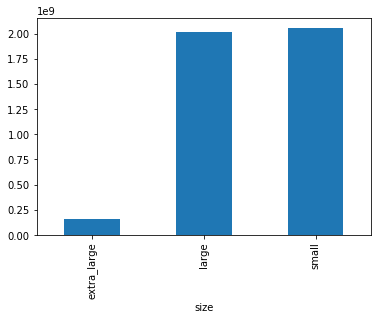

In [3]:
# which avocado size is most popular?
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

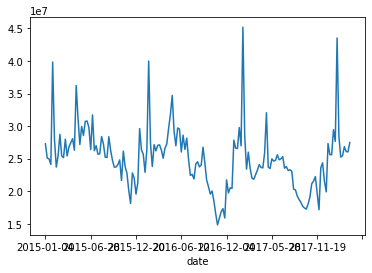

In [4]:
# Changes in sales over time

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x="date",y="nb_sold_by_date",kind="line")

# Show the plot
plt.show()

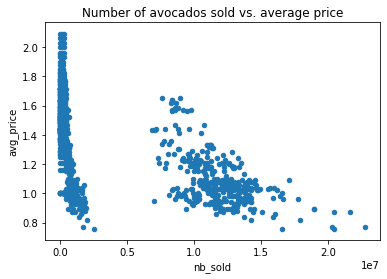

In [5]:
# Avocado supply and demand

# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold",y="avg_price",kind="scatter",title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

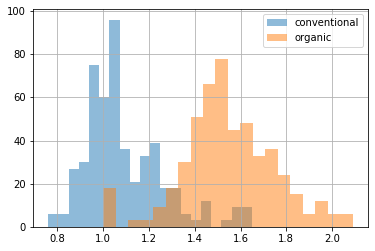

In [7]:
# Price of conventional vs. organic avocados

# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

# Missing values

In [8]:
# find missing values

avocados_2016=avocados[avocados["year"]==2016]

In [9]:
avocados_2016.head()

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94


In [11]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())


      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]


In [12]:
# Check each column for missing values
print(avocados_2016.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


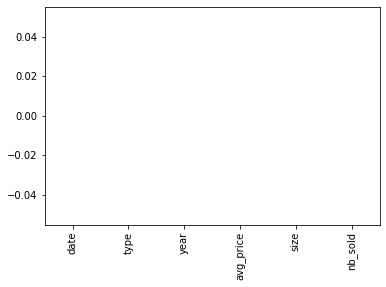

In [13]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

In [14]:
# remove missing values
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


In [16]:
# replace missing values
avocados_2016.fillna(0)

,date,type,year,avg_price,size,nb_sold
52,2016-12-25,conventional,2016,1.00,small,9255125.20
53,2016-12-18,conventional,2016,0.96,small,9394065.91
54,2016-12-11,conventional,2016,0.98,small,9009996.11
55,2016-12-04,conventional,2016,1.00,small,11043350.90
56,2016-11-27,conventional,2016,1.21,small,7891487.94
...,...,...,...,...,...,...
944,2016-01-31,organic,2016,1.43,extra_large,5515.91
945,2016-01-24,organic,2016,1.41,extra_large,12933.97
946,2016-01-17,organic,2016,1.44,extra_large,13106.29
947,2016-01-10,organic,2016,1.35,extra_large,8771.79


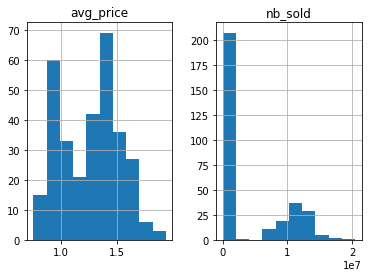

In [23]:
# multiple histograms
avocados_2016[["avg_price","nb_sold"]].hist()
plt.show()

In [25]:
# creating dataframes

# from a list of dictionaries - by row
# from a dictionary of lists - by column

import pandas as pd
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071
},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


In [26]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096
]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
